# 3. SVM

## Import packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.svm import LinearSVC, SVC
import csv
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# Dataset1: Color Classification

## Load data
The datasets have contained about 80 images for training datasets for whole color classes and 90 images for the test set. colors which are prepared for this application is y yellow, black, white, green, red, orange, blue a and violet. In this implementation, basic colors are preferred for classification. and created a dataset containing images of these basic colors. The dataset also includes masks for all images. we create these masks by binarizing the image. we did the masking on the images I collected and painted the pixels belonging to the class color to white and the remaining pixels to the black color.

Reference: https://www.kaggle.com/datasets/ayanzadeh93/color-classification

1. set path, categories, create_training_data function

In [2]:
DATADIR = './dataset1/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE = 100
def create_training_data(training_data=[]):
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])

./dataset1/ColorClassification\orange


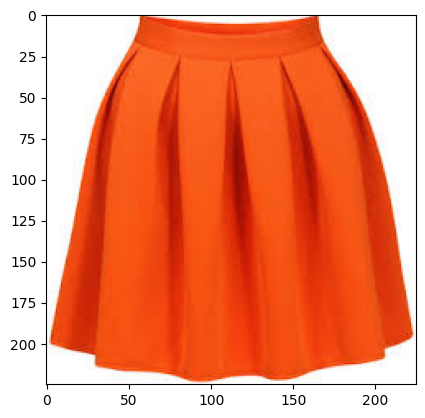

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        print(path)
        plt.imshow(img_array)
        plt.show()
        break
    break

2. get X, y

In [4]:
training_data=[]
create_training_data(training_data) 
data_len = len(training_data)
print("training_data_length:", data_len)

X = []
y = []
for categories, label in training_data:
    X.append(categories)
    y.append(label)
X = np.array(X).reshape(data_len, -1)
X = X / 255.0 # flattening the array
y = np.array(y)
print("X shape:", X.shape)
print("y shape:", y.shape)

training_data_length: 107
X shape: (107, 30000)
y shape: (107,)


3. Split data to train and test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.8)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (85, 30000)
x_test shape: (22, 30000)


## Models

In [6]:
# default SVM
svc = SVC(kernel='linear',gamma='auto')
svc.fit(x_train, y_train)
pred1 = svc.predict(x_test)
print("Accuracy on testing dataset:",accuracy_score(y_test, pred1))

Accuracy on testing dataset: 0.9545454545454546


### use GridSearchCV to find the best parameters

In [8]:
svc = SVC(kernel='linear',gamma='auto')
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-5, 1e-4, 1e-3, 1e-2], 'C': [0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'gamma': [1e-3, 1e-2, 1e-1, 1, 10], 'C': [0.1, 1, 10, 100]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(x_train, y_train)
print(clf.best_params_)
pred2 = clf.predict(x_test)
print("Accuracy on testing dataset:",accuracy_score(y_test, pred2))

{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
Accuracy on testing dataset: 0.9545454545454546


## Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")
print("Accuracy on testing dataset:\n",classification_report(y_test,pred1))
print("Accuracy on testing dataset:\n",classification_report(y_test,pred2))

Accuracy on testing dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         4

    accuracy                           0.95        22
   macro avg       0.96      0.97      0.96        22
weighted avg       0.97      0.95      0.96        22

Accuracy on testing dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4      

In [ ]:
result1 = pd.DataFrame({'original' : y_test,'predicted' : pred1})
result1.head()

,original,predicted
0,2,2
1,1,1
2,7,7
3,2,2
4,1,1


In [ ]:
result2 = pd.DataFrame({'original' : y_test,'predicted' : pred2})
result2.head()


,original,predicted
0,2,2
1,1,1
2,7,7
3,2,2
4,1,1


## Models (different kernel)

In [ ]:
titles = ['SVC with linear kernel',
          'SVC with polynomial kernel',
          'SVC with RBF kernel',
          'LinearSVC (linear kernel)',]

models = (SVC(kernel='linear', C=1),
          SVC(kernel='poly', C=1),
          SVC(kernel='rbf', C=1),
          LinearSVC(C=1))
models = [clf.fit(x_train, y_train) for clf in models]
preds = [clf.predict(x_test) for clf in models]
accuracy = [accuracy_score(y_test, pred) for pred in preds]
for i, a in enumerate(accuracy):
    print(titles[i], ":", a)

SVC with linear kernel : 0.9545454545454546
SVC with polynomial kernel : 0.8181818181818182
SVC with RBF kernel : 0.8181818181818182
LinearSVC (linear kernel) : 0.36363636363636365


## Analysis (different kernel)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i, p in enumerate(preds):
    print("Accuracy", titles[i], "\n",classification_report(y_test, p))

Accuracy SVC with linear kernel 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         4

    accuracy                           0.95        22
   macro avg       0.96      0.97      0.96        22
weighted avg       0.97      0.95      0.96        22

Accuracy SVC with polynomial kernel 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         4
           2       1.00      0.75      0.86         4
           3       0.75      1.00      0.86         3
      

# Dataset2: Mobile Price Classification

## Load data
It is a binary classifiation dataset that classify if price is high or not for a cell phone, the label is stored in `price_range` column.

More information of features are in "feature_description.txt".

In [ ]:
train_df = pd.read_csv('./dataset2/train.csv')
test_df = pd.read_csv('./dataset2/test.csv')

print("training data size:", train_df.shape)
print("testing data size:", test_df.shape)

# separate out x and y
train_x = train_df.drop(['price_range'], axis=1)
train_y = train_df[['price_range']]
test_x = test_df.drop(['price_range'], axis=1)
test_y = test_df[['price_range']]

feature_names = train_x.columns
train_df.head()

training data size: (1400, 21)
testing data size: (600, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,831,0,1.7,1,7,1,26,0.7,177,5,...,511,621,1704,6,5,20,1,1,1,0
1,825,1,1.5,0,11,0,38,0.4,94,3,...,540,783,716,11,4,14,0,1,0,0
2,1441,0,2.1,1,11,1,3,0.1,118,8,...,577,1071,2317,16,4,7,1,0,1,2
3,765,1,2.5,0,3,0,44,0.3,88,8,...,1364,1851,2256,6,1,19,0,1,1,2
4,1503,1,0.7,0,10,1,43,0.2,166,4,...,841,1304,2122,15,1,2,1,0,0,2


## Models

### use GridSearchCV to find the best parameters

In [ ]:
svc = SVC(kernel='linear',gamma='auto')
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-12, 1e-11, 1e-10, 1e-9, 1e-8], 'C': [1e5, 1e6, 1e7, 1e8, 1e9]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(train_x, train_y)
print(clf.best_params_)
pred = clf.predict(test_x)
print("Accuracy on testing dataset:",accuracy_score(test_y, pred))
pred_t = clf.predict(train_x)
print("Accuracy on training dataset:",accuracy_score(train_y, pred_t))

{'C': 10000000.0, 'gamma': 1e-10, 'kernel': 'rbf'}
Accuracy on testing dataset: 0.9716666666666667
Accuracy on training dataset: 0.9814285714285714


In [ ]:
import warnings
warnings.filterwarnings("ignore")
print("Accuracy on testing dataset:\n", classification_report(test_y, pred))

Accuracy on testing dataset:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       154
           1       0.96      0.96      0.96       134
           2       0.96      0.96      0.96       158
           3       0.98      0.99      0.98       154

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



## Models (different kernel)

In [ ]:
titles = ['SVC with linear kernel',
          'SVC with polynomial kernel',
          'SVC with RBF kernel',
          'LinearSVC (linear kernel)',]

models = (SVC(kernel='linear', C=1),
          SVC(kernel='poly', C=1),
          SVC(kernel='rbf', C=1),
          LinearSVC(C=1))
models = [clf.fit(train_x, train_y) for clf in models]
preds = [clf.predict(test_x) for clf in models]
accuracy = [accuracy_score(test_y, pred) for pred in preds]
for i, a in enumerate(accuracy):
    print(titles[i], ":", a)

SVC with linear kernel : 0.9666666666666667
SVC with polynomial kernel : 0.9533333333333334
SVC with RBF kernel : 0.9533333333333334
LinearSVC (linear kernel) : 0.31


## Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i, p in enumerate(preds):
    print("Accuracy", titles[i], "\n",classification_report(test_y,p))

Accuracy SVC with linear kernel 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       154
           1       0.97      0.96      0.96       134
           2       0.94      0.96      0.95       158
           3       0.97      0.97      0.97       154

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

Accuracy SVC with polynomial kernel 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       154
           1       0.95      0.95      0.95       134
           2       0.93      0.92      0.92       158
           3       0.95      0.95      0.95       154

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

Accuracy SVC with RBF kernel 
               precision    

## Models (parameters same as kaggle)

ref: https://www.kaggle.com/code/rezasemyari/mobile-price-prediction-0-983#Classification

In [ ]:
clf = SVC(C=42,random_state=0,kernel='poly',degree=2)
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
score = accuracy_score(test_y, y_pred)
print(score)

0.965


In [ ]:
import warnings
warnings.filterwarnings("ignore")
print("Accuracy on testing dataset:\n", classification_report(test_y, pred))

Accuracy on testing dataset:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       154
           1       0.96      0.96      0.96       134
           2       0.96      0.96      0.96       158
           3       0.98      0.99      0.98       154

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



# Dataset3: my cat or not my cat

## Load Data

In [ ]:
CATEGORIES = ['my_cat', 'not_my_cat']
IMG_SIZE = 100

def get_dataset3():
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    with open('./dataset3/train.csv', newline='') as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            filename, label = row
            filename = os.path.join("./dataset3/train", filename)
            img_array = cv2.imread(filename)
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            x_train.append(new_array)
            y_train.append(label)
    csv_file.close()

    with open('./dataset3/test.csv', newline='') as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            filename, label = row
            filename = os.path.join("./dataset3/test", filename)
            img_array = cv2.imread(filename)
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            x_test.append(new_array)
            y_test.append(label)
    csv_file.close()
    return x_train, y_train, x_test, y_test


1


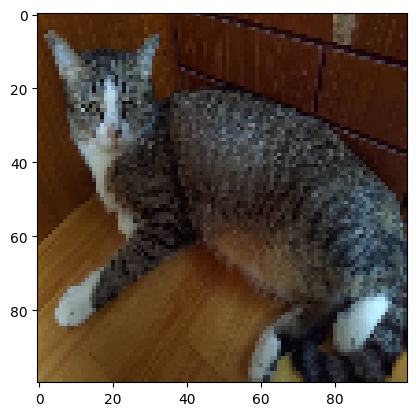

In [ ]:
x_train, y_train, x_test, y_test = get_dataset3()
img = x_train[0]
print(y_train[0])
img_array = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
plt.show()

In [ ]:
x_train = np.array(x_train).reshape(len(x_train), -1)
x_train = x_train / 255.0
y_train = np.array(y_train)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_test = np.array(x_test).reshape(len(x_test), -1)
x_test = x_test / 255.0
y_test = np.array(y_test)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (186, 30000)
y_train shape: (186,)
x_test shape: (81, 30000)
y_test shape: (81,)


In [ ]:
titles = ['SVC with linear kernel',
          'SVC with polynomial kernel',
          'SVC with RBF kernel',
          'LinearSVC (linear kernel)',]

models = (SVC(kernel='linear', C=1),
          SVC(kernel='poly', C=1),
          SVC(kernel='rbf', C=1),
          LinearSVC(C=1))

models = [clf.fit(x_train, y_train) for clf in models]
preds = [clf.predict(x_test) for clf in models]
accuracy = [accuracy_score(pred, y_test) for pred in preds]
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = [le.transform(pred) for pred in preds]
rocauc = [roc_auc_score(y_test_encoded, p) for p in y_pred_encoded ]
for i, a in enumerate(accuracy):
    print(titles[i], ":", a, rocauc[i])

SVC with linear kernel : 0.8024691358024691 0.7988329238329238
SVC with polynomial kernel : 0.7901234567901234 0.7874692874692875
SVC with RBF kernel : 0.8148148148148148 0.8123464373464373
LinearSVC (linear kernel) : 0.7530864197530864 0.7447788697788699


## Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i, p in enumerate(preds):
    print("Accuracy", titles[i], "\n",classification_report(y_test,p))

Accuracy SVC with linear kernel 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        44
           1       0.77      0.73      0.75        37

    accuracy                           0.78        81
   macro avg       0.78      0.77      0.78        81
weighted avg       0.78      0.78      0.78        81

Accuracy SVC with polynomial kernel 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        44
           1       0.78      0.76      0.77        37

    accuracy                           0.79        81
   macro avg       0.79      0.79      0.79        81
weighted avg       0.79      0.79      0.79        81

Accuracy SVC with RBF kernel 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.81      0.78      0.79        37

    accuracy                           0.81        81
   macro avg       0.81  

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-11, 1e-10, 1e-9], 'C': [1, 100, 1000, 1e4]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(x_train, y_train)
print(clf.best_params_)
pred = clf.predict(x_test)
print("Accuracy on testing dataset:",accuracy_score(y_test, pred))

print("classification_report:\n", classification_report(y_test,pred))

{'C': 1, 'gamma': 1e-11, 'kernel': 'rbf'}
Accuracy on testing dataset: 0.5432098765432098
classification_report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        44
           1       0.00      0.00      0.00        37

    accuracy                           0.54        81
   macro avg       0.27      0.50      0.35        81
weighted avg       0.30      0.54      0.38        81

